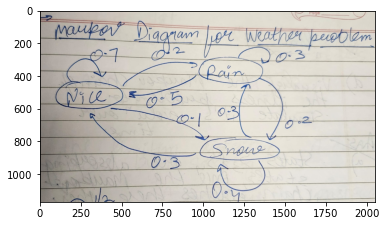

In [2]:
import matplotlib.pyplot as plt
pic=plt.imread('Math444pic4.jpg')
plt.imshow(pic);

Enhanced image saved as 'markov_chain_diagram.jpg'.
Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): 1
Choose a starting point (1-3): 3
Enter the number of steps: 100
Number of steps: 100
Path taken in the random walk: [3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3]
Probability distribution after 100 steps: [0.58064516 0.24193548 0.17741935]
Calculating long-term distribution without weights...
Long-term distribution starting from custom distribution: [0.5702845 0.240709  0.1890065]
The state with the highest long-term probability is State 1 with a probability of 0.5703.


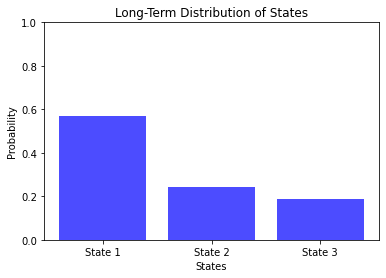

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the new 3x3 Transition Matrix for the Markov chain
transition_matrix = np.array([
    [0.7, 0.5, 0.3],
    [0.2, 0.3, 0.3],
    [0.1, 0.2, 0.4]
])

# Function to enhance the quality of the input image and save it

def enhance_image(input_path='math444pic4.jpg', output_path='markov_chain_diagram.jpg'):
    img = Image.open(input_path)
    img = img.convert("RGB").resize((img.width * 2, img.height * 2), Image.ANTIALIAS)
    img.save(output_path)
    print(f"Enhanced image saved as '{output_path}'.")

# Function to simulate the random walk
def random_walk(transition_matrix, start, n_steps):
    state = start
    visits = np.zeros(3)  # Keep track of visits to each state
    for _ in range(n_steps):
        visits[state - 1] += 1  # Count visit to the current state
        state = np.random.choice(range(1, 4), p=transition_matrix[:, state - 1])
    return visits

# Function to print the path taken in the random walk
def print_random_walk_path(transition_matrix, start, n_steps):
    state = start
    path = [state]  # Start path with the initial state
    for _ in range(n_steps):
        state = np.random.choice(range(1, 4), p=transition_matrix[:, state - 1])
        path.append(state)
    print("Path taken in the random walk:", path)

# Function to simulate the long-term distribution based on multiple cycles without weights
def simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=20000):
    all_distributions = np.zeros((cycles, 3))  # Store distributions for each cycle

    for cycle in range(cycles):
        visits = random_walk(transition_matrix, np.random.choice(range(1, 4), p=start_distribution), n_steps)
        all_distributions[cycle] = visits / n_steps  # Normalize visits to get distribution

    average_distribution = np.mean(all_distributions, axis=0)  # Calculate average distribution across cycles

    return average_distribution

# Function to calculate the probability distribution after n steps
def probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps):
    start_distribution = start_distribution / np.sum(start_distribution)
    transition_matrix_n_steps = np.linalg.matrix_power(transition_matrix, n_steps)
    new_distribution = transition_matrix_n_steps @ start_distribution
    return new_distribution

# Visualize the long-term distribution as a bar graph
def visualize_long_term_distribution(long_term_distribution):
    states = [f"State {i + 1}" for i in range(3)]
    plt.bar(states, long_term_distribution, color='blue', alpha=0.7)
    highest_prob_state = np.argmax(long_term_distribution) + 1
    highest_prob_value = long_term_distribution[highest_prob_state - 1]
    print(f"The state with the highest long-term probability is State {highest_prob_state} with a probability of {highest_prob_value:.4f}.")
    plt.title("Long-Term Distribution of States")
    plt.ylabel("Probability")
    plt.xlabel("States")
    plt.ylim(0, 1)
    plt.show()

# Main program to interact with the user
def main():
    # Enhance and save the image
    enhance_image()

    # User chooses whether to pick a starting point or random
    choice = input("Would you like to provide a starting point? (1. Specific state, 2. Custom initial state vector, 3. Random starting point): ")
    if choice == '1':
        start = int(input("Choose a starting point (1-3): "))
        if start < 1 or start > 3:
            print("Invalid starting point, defaulting to 1.")
            start = 1
        start_distribution = np.zeros(3)
        start_distribution[start - 1] = 1
    elif choice == '2':
        start_vector = input("Enter a custom initial state vector (comma-separated probabilities for states 1-3): ")
        start_distribution = np.array([float(x) for x in start_vector.split(",")])
        if np.sum(start_distribution) != 1 or len(start_distribution) != 3:
            print("Invalid input. Defaulting to uniform distribution.")
            start_distribution = np.array([1/3, 1/3, 1/3])
    else:
        start = random.choice(range(1, 4))
        start_distribution = np.zeros(3)
        start_distribution[start - 1] = 1
        print(f"Randomly chosen starting point: State {start}")

    # User inputs the number of steps
    n_steps = int(input("Enter the number of steps: "))
    print(f"Number of steps: {n_steps}")

    # Print the random walk path
    print_random_walk_path(transition_matrix, start, n_steps)

    # Calculate and print the probability distribution after n steps
    prob_dist_n_steps = probability_distribution_after_n_steps(transition_matrix, start_distribution, n_steps)
    print("Probability distribution after", n_steps, "steps:", prob_dist_n_steps)

    # Simulate the long-term distribution without weights
    print("Calculating long-term distribution without weights...")
    long_term_distribution = simulate_long_term_distribution(transition_matrix, start_distribution, n_steps, cycles=20000)
    print("Long-term distribution starting from custom distribution:", long_term_distribution)

    # Visualize the long-term distribution
    visualize_long_term_distribution(long_term_distribution)

# Run the main function
if __name__ == "__main__":
    main()